In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import math
import seaborn as sn
from scipy.stats import pearsonr

In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vipin/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [3]:
df = pd.read_csv("BTP Data-001/BTP Data/Process_Rainfall_Data/1Malappuram-Angadipuram_processed.csv")

In [4]:
df

,Date,RF
0,1990-06-01,8.0
1,1990-06-02,0.0
2,1990-06-03,11.8
3,1990-06-04,3.0
4,1990-06-05,0.0
...,...,...
9127,2016-12-27,0.0
9128,2016-12-28,0.0
9129,2016-12-29,0.0
9130,2016-12-30,-1.0


In [5]:
df = df.replace(-1.0,np.nan)

In [6]:
df

,Date,RF
0,1990-06-01,8.0
1,1990-06-02,0.0
2,1990-06-03,11.8
3,1990-06-04,3.0
4,1990-06-05,0.0
...,...,...
9127,2016-12-27,0.0
9128,2016-12-28,0.0
9129,2016-12-29,0.0
9130,2016-12-30,NaN


In [7]:
df = df.assign(RF=df.RF.interpolate(method='linear',limit_direction='both'))

In [8]:
df

,Date,RF
0,1990-06-01,8.0
1,1990-06-02,0.0
2,1990-06-03,11.8
3,1990-06-04,3.0
4,1990-06-05,0.0
...,...,...
9127,2016-12-27,0.0
9128,2016-12-28,0.0
9129,2016-12-29,0.0
9130,2016-12-30,0.0


In [9]:
df.isna().sum()

Date    0
RF      0
dtype: int64

In [10]:
tot_RF = []
latency = 7
dt = []
week = []
for i in range(0,len(df)-latency,latency):
    tot_RF.append(np.sum(df['RF'][i:i+latency]))
    dd = str(df['Date'][i])+ "~" + str(df['Date'][i+latency])
    dt.append(dd)

In [11]:
len(dt)

1304

In [12]:
data = tot_RF
U = [min(data) , max(data)]

In [13]:
DATA = (data-U[0])/(U[1] - U[0])
Data = (np.array(DATA))
Data = np.reshape(Data , (Data.shape[0],1))

slt1 = int(0.80*len(data))
slt2 = int(0.90*len(data))
Train = Data[:slt1]
Val = Data[slt1:slt2]
Test = Data[slt1:]
DT = dt[slt1:]

In [14]:
x_axis = [i+1 for i in range(len(data))]
x_tr = x_axis[:slt1]
x_val = x_axis[slt1:slt2]
x_tst = x_axis[slt2:]
al = (U[1] - U[0]) + U[0]

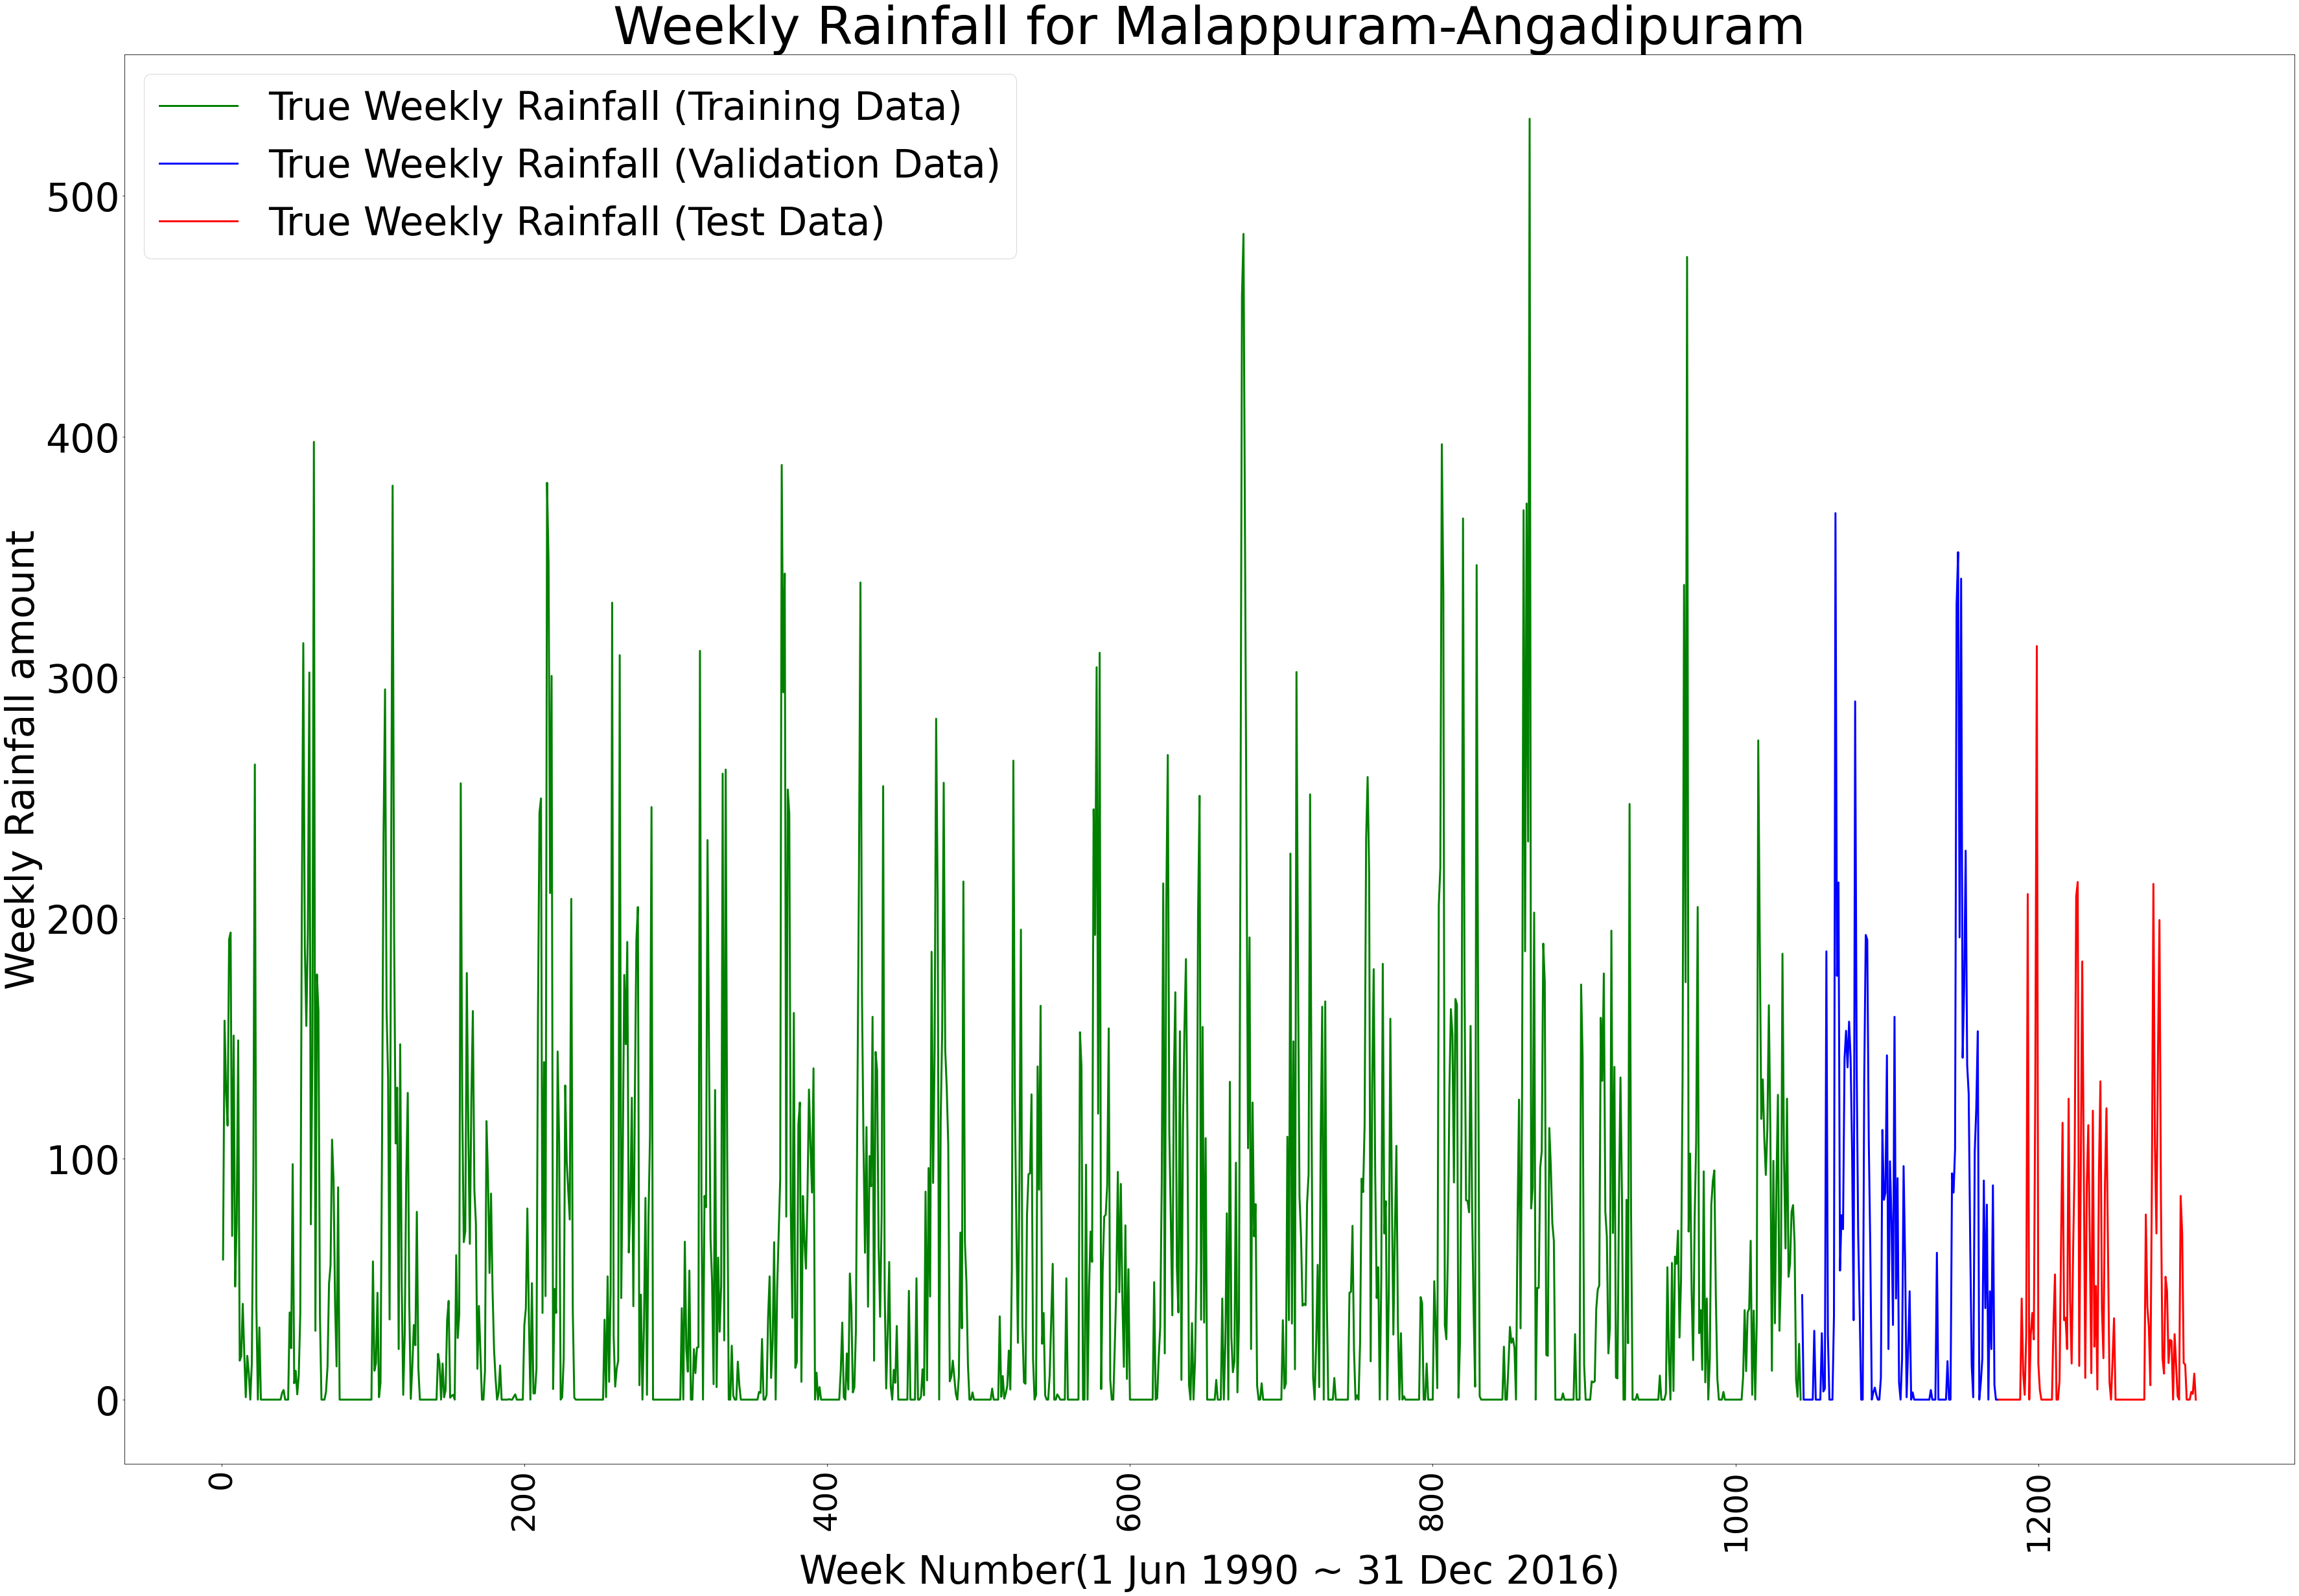

In [15]:
f = plt.figure() 
f.set_figwidth(60) 
f.set_figheight(40)
plt.title('Weekly Rainfall for Malappuram-Angadipuram', fontsize = 80)
plt.xticks(fontsize=50, rotation=90)
plt.yticks(fontsize=60, rotation=0)
#plt.xticks(ticks,xaxis)
plt.ylabel('Weekly Rainfall amount',fontsize=60)
plt.xlabel('Week Number(1 Jun 1990 ~ 31 Dec 2016)',fontsize=60)
plt.plot(x_tr, Train*al, 'g',linestyle='-', linewidth='3', label = 'True Weekly Rainfall (Training Data)')
plt.plot(x_val, Val*al, 'b',linestyle='-', linewidth='3', label = 'True Weekly Rainfall (Validation Data)')
plt.plot(x_tst, Data[slt2:]*al, 'r',linestyle='-', linewidth='3', label = 'True Weekly Rainfall (Test Data)')
plt.legend(loc='best',prop={'size': 60})

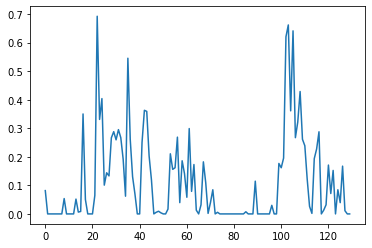

In [16]:
plt.plot(Val)

In [17]:
import GMM_K

numStates = 9
numMixtureComp = 2
dimension = 1
numIterations = 200
threshold = 0.0
covariance_type = 'full'
verbose = True


model = GMM_K.GmmHmmLikelihoodSimilarity_K(
    numStates=numStates,
    numMixtureComp=numMixtureComp,
    dimension=dimension,
    numIterations=numIterations,
    threshold=threshold,
    covariance_type=covariance_type,
    verbose = True
)

In [18]:
logValues = model.train([Train])

         1          -7.6264             +nan
         2         796.5766        +804.2030
         3         991.6676        +195.0910
         4        1174.8631        +183.1955
         5        1349.1929        +174.3298
         6        1520.8432        +171.6503
         7        1706.8968        +186.0536
         8        1884.0277        +177.1309
         9        2068.6201        +184.5924
        10        2267.3593        +198.7393
        11        2449.4529        +182.0935
        12        2822.2122        +372.7594
        13        3560.2886        +738.0764
        14        4713.1344       +1152.8458
        15       18824.6641      +14111.5297
        16        2854.1966      -15970.4675


Has model converged:  True


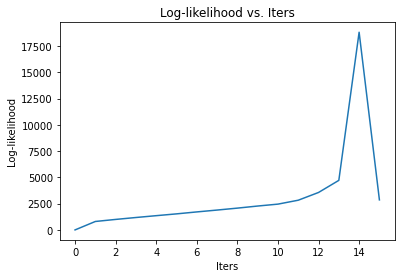

In [19]:
plt.plot(logValues, label='log-likelihood')
plt.xlabel('Iters')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs. Iters')
print('Has model converged: ', model.model.monitor_.converged)

In [20]:
K = len(Train)
rmse = []
MAE = []
CC = []
for k in range(1,K):
    pred = model.predict(Val,k)
    p2 = pred*(U[1] - U[0]) + U[0]
    T1 = Val*(U[1] - U[0]) + U[0]
    rmse.append(mean_squared_error(p2, T1, squared=False))
    MAE.append(mae(T1,p2))
    d1 = np.array(T1)
    d1 = np.reshape(d1 , d1.shape[0])
    d2 = np.array(p2)
    d2 = np.reshape(d2 , d2.shape[0])
    corr, _ = pearsonr(d1, d2)
    CC.append(corr)
    print(k)

1
2
3
4


KeyboardInterrupt: 

In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (50,10))
# ax1.set_xlim(1, K)
# ax1.set_xlabel('K', fontweight ='bold', fontsize = 30)
# ax1.set_ylabel('RMSE', fontweight ='bold', fontsize = 30)
# ax1.grid(True)
# ax1.set_title('RMSE vs K', fontsize = 30, fontweight ='bold')
# ax1.plot(rmse, linewidth='5')
# ax1.tick_params(axis='both', which='major', labelsize=30)


# ax2.set_xlim(1, K)
# ax2.set_xlabel('K', fontweight ='bold', fontsize = 30)
# ax2.set_ylabel('MAE', fontweight ='bold', fontsize = 30)
# ax2.grid(True)
# ax2.set_title('MAE vs K', fontsize = 30, fontweight ='bold')
# ax2.plot(MAE, linewidth='5')
# ax2.tick_params(axis='both', which='major', labelsize=30)

# ax3.set_xlim(1, K)
# ax3.set_xlabel('K', fontweight ='bold', fontsize = 30)
# ax3.set_ylabel('CC', fontweight ='bold', fontsize = 30)
# ax3.grid(True)
# ax3.set_title('CC vs K', fontsize = 30, fontweight ='bold')
# ax3.plot(CC, linewidth='5')
# ax3.tick_params(axis='both', which='major', labelsize=30)


In [ ]:
th = 43
st = 'K='+str(th)
f, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('K', fontweight ='bold', fontsize = 12)
ax.set_ylabel('RMSE', fontweight ='bold', fontsize = 12)
ax.set_title('RMSE vs K', fontsize = 12, fontweight ='bold')
ax.plot(rmse, '-' , label = 'RMSE value')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.plot([0, 0.7], [0, 0.7], transform=ax.transAxes, label = 'Diagonal Line')
ax.plot(th, rmse[th-1], 'go')
ax.axvline(x=th , ymax = 0.25,ls='--',c='black')
ax.text(th+5, rmse[th-1]-4, st, fontsize=12)
ax.legend()

In [21]:
pred = model.predict(Test,len(Train))
p2 = pred*(U[1] - U[0]) + U[0]
T1 = Test*(U[1] - U[0]) + U[0]

In [22]:
len(DT)

261

In [23]:
xaxis = [DT[i] for i in range(0,len(DT),10)]
ticks = [i+1 for i in range(0,len(DT),10)]

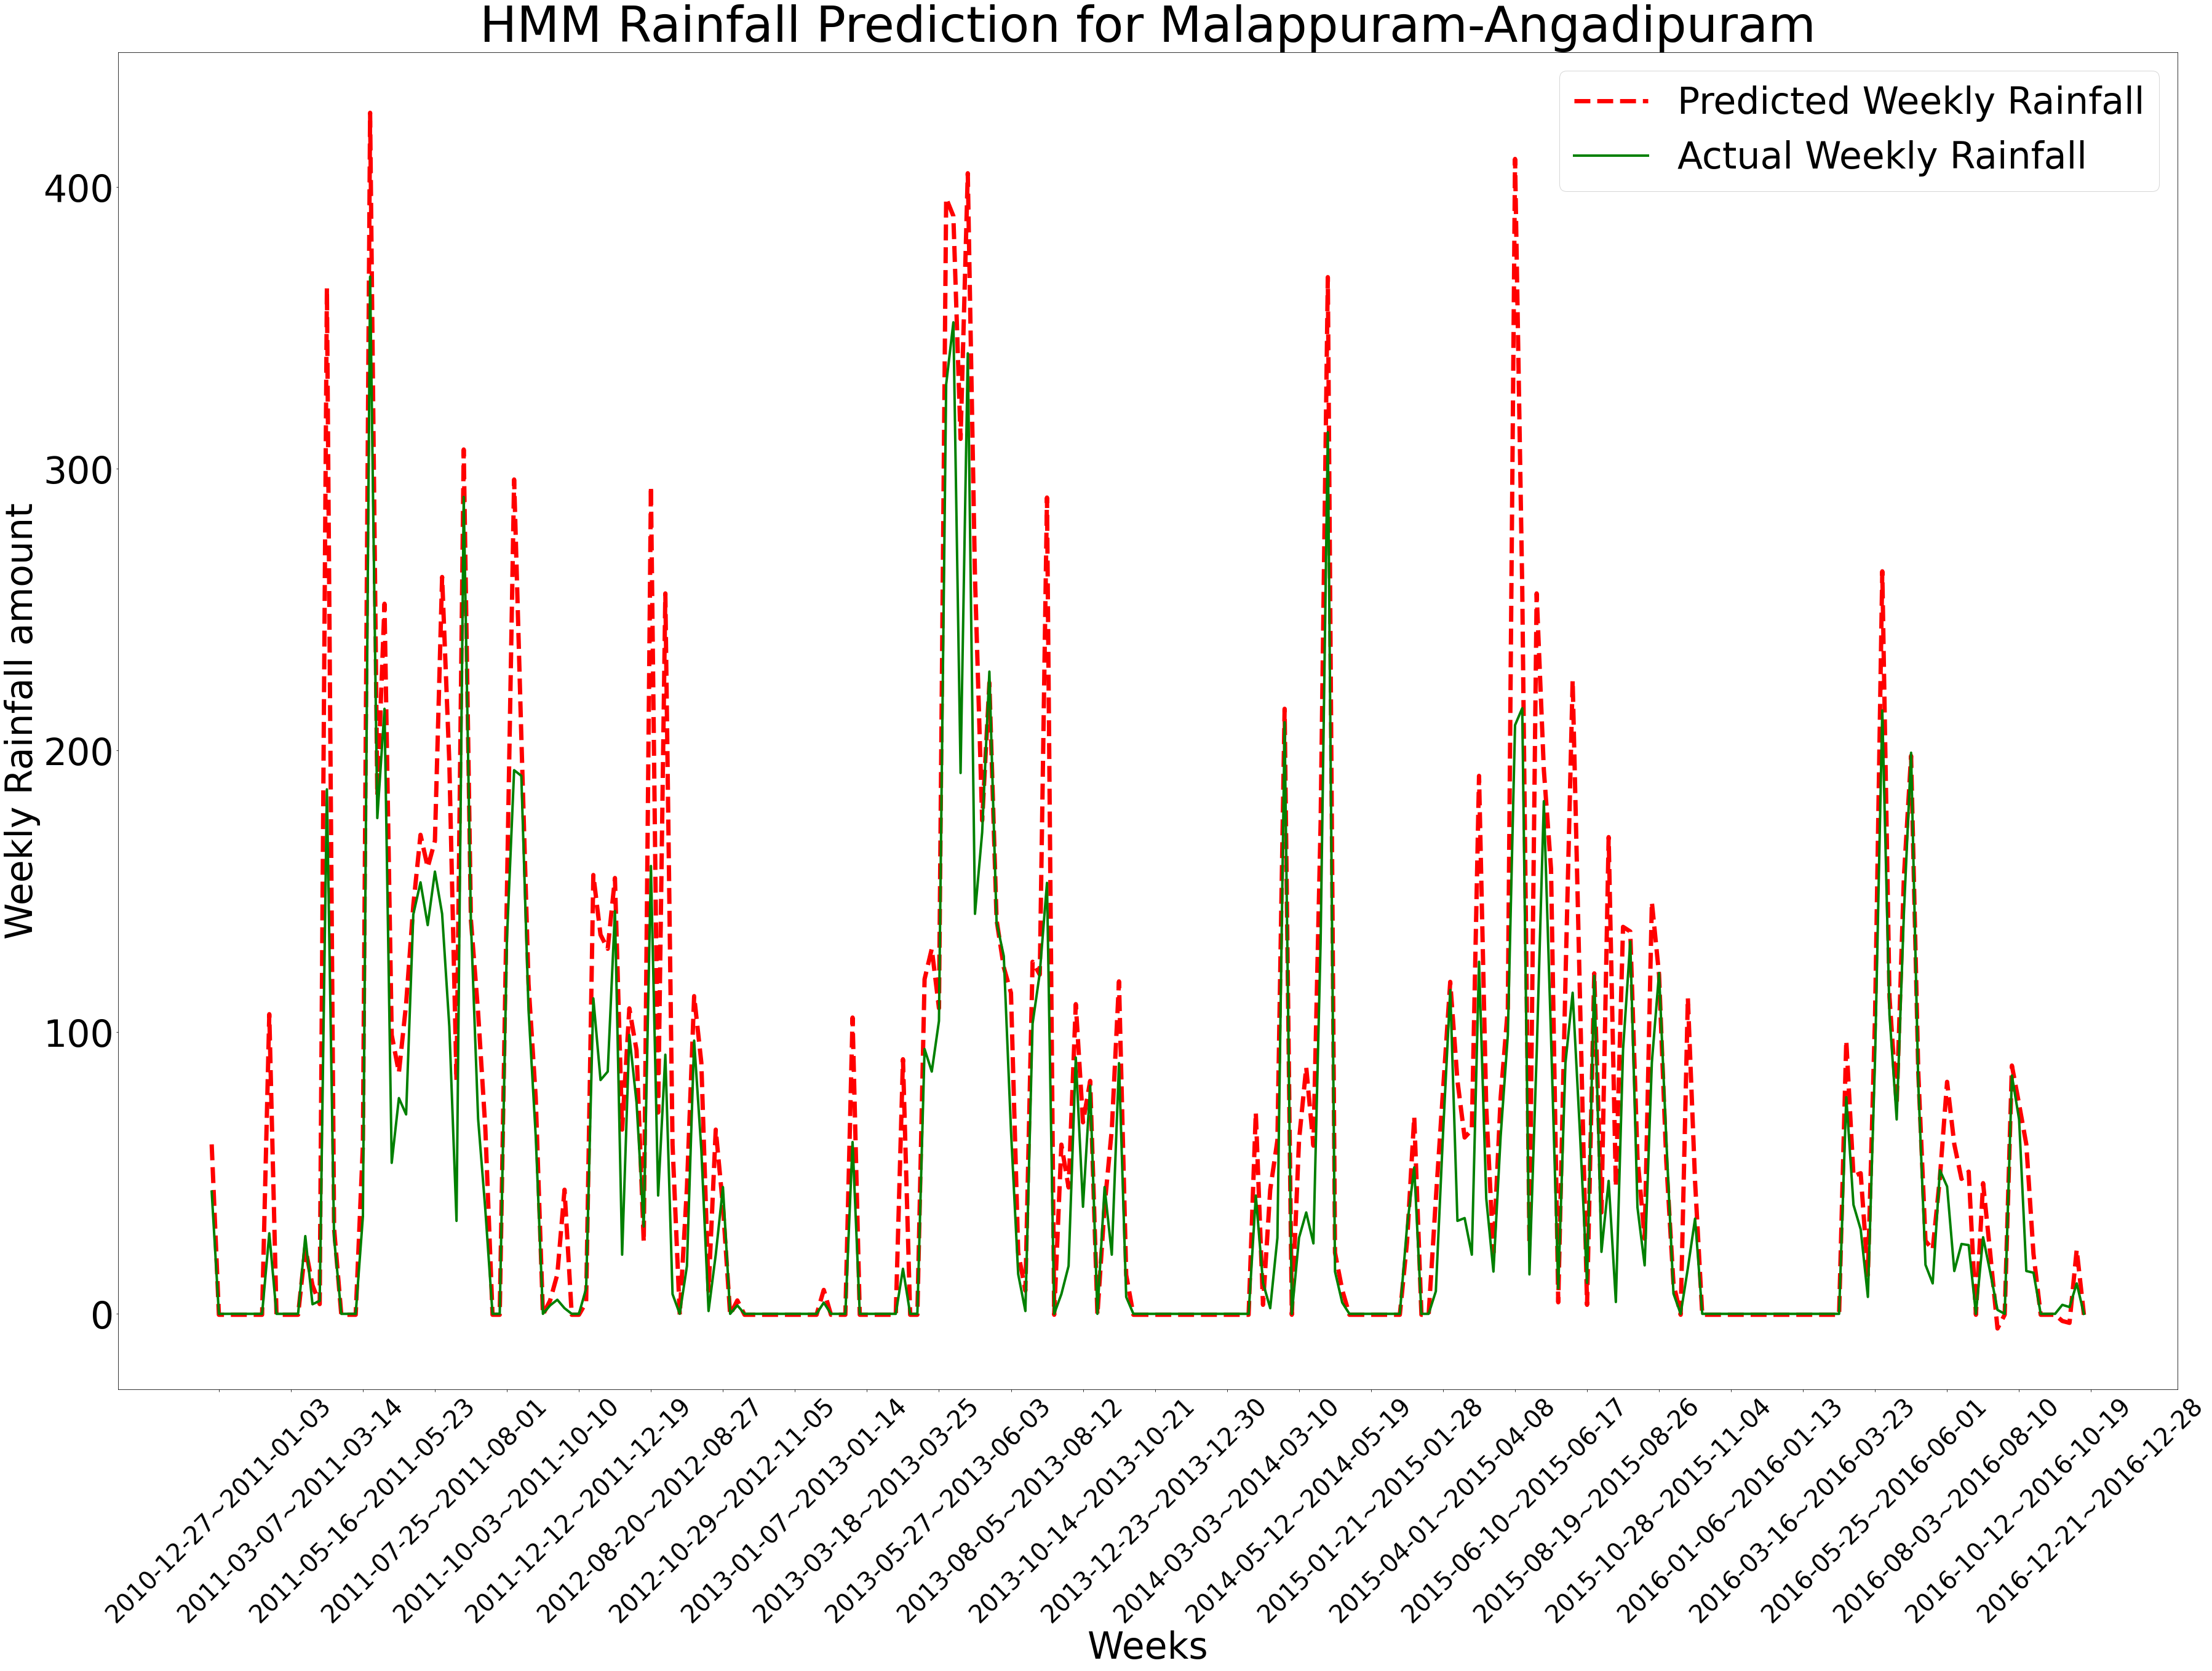

In [24]:
f = plt.figure() 
f.set_figwidth(60) 
f.set_figheight(40)
#plt.tick_params(axis='both', which='major', labelsize=30)
plt.title('HMM Rainfall Prediction for Malappuram-Angadipuram', fontsize = 80)
plt.xticks(fontsize=40, rotation=45)
plt.yticks(fontsize=60, rotation=0)
plt.xticks(ticks,xaxis)
plt.ylabel('Weekly Rainfall amount',fontsize=60)
plt.xlabel('Weeks',fontsize=60)
plt.plot(p2-8, 'r', linestyle='--', linewidth='7', label = 'Predicted Weekly Rainfall')
plt.plot(T1, 'g',linestyle='-', linewidth='4', label = 'Actual Weekly Rainfall')
plt.legend(loc='best',prop={'size': 60})

In [25]:
mean_squared_error(T1, p2-8, squared=False)

38.52847771341993

In [26]:
mae(T1,p2-8)

19.83608499914793

In [27]:
d1 = np.array(T1)
d1 = np.reshape(d1 , d1.shape[0])
d2 = np.array(p2)
d2 = np.reshape(d2 , d2.shape[0])

corr, _ = pearsonr(d1, d2)
corr

0.9456445285545687